In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import pytorch_lightning as pl
from torch import nn
import math
from itertools import product
import torch.nn.functional as F

import os, sys
sys.path.append(os.path.join(os.getcwd(), '../symlie'))
sys.path.append(os.path.join(os.getcwd(), '../sympde/viz'))
sys.path.append(os.path.join(os.getcwd(), '../sympde/misc'))

from run import parse_options, main

from data.dataset import MnistDataset
from model.networks.linear import MyLinear
from model.networks.mlp import MLP

from general_plots import imshows, plot_vals, simple_imshow
from equiv import assert_equiv

plt.rcParams['image.cmap'] = 'viridis'


/Users/elias/anaconda3/envs/sympde/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# args = parse_options(notebook=True)
# args.net = 'LearnY'

# args.max_epochs = 20

# model, trainer, datamodule = main(args)


In [3]:
# x, y, eps = batch = next(iter(datamodule.test_dataloader()))

In [2]:
# lrs = torch.logspace(-7, -1, 7)
lrs = [1e-1]
# seeds = torch.arange(1, 5)
seeds = [1]

for seed, lr in product(seeds, lrs):
    print(f'lr={lr}, seed={seed}')

    args = parse_options(notebook=True)
    args.net = 'LearnPw'

    # args.do_return = False
    args.train = False
    args.version = 'version_0'
    args.lr = lr
    args.seed = seed
    args.n_splits = [10_000, 1_000, 1_000]
    args.max_epochs = 20

    model, trainer, datamodule = main(args)

    # w_index_hat = model.net.w_index.data.clone()
    # w_index_hat = model.net.normalize_w_index(w_index_hat)

    # plt.figure(figsize = (3,3))
    # plt.imshow(w_index_hat)
    # plt.show()



Seed set to 1
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


lr=0.1, seed=1


###	Version:  version_0 	###
###	Name:  symlie_dataflat_netLearnPw_transformspace_translation_lr-1.00_seed1 	###




/Users/elias/anaconda3/envs/sympde/lib/python3.10/site-packages/pytorch_lightning/trainer/setup.py:187: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Testing DataLoader 0: 100%|██████████| 500/500 [00:00<00:00, 803.81it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.0002394437906332314   │
└───────────────────────────┴───────────────────────────┘

Testing DataLoader 0: 100%|██████████| 500/500 [00:00<00:00, 839.63it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.000236342559219338    │
└───────────────────────────┴───────────────────────────┘

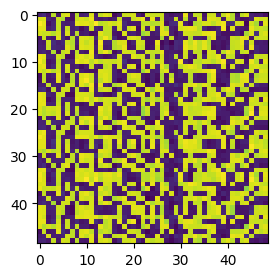

In [3]:
w_index_hat = model.net.w_index.data.clone()
w_index_hat = model.net.normalize_w_index(w_index_hat)

plt.figure(figsize = (3,3))
plt.imshow(w_index_hat)
plt.show()

In [4]:
x, y, eps = batch = next(iter(datamodule.test_dataloader()))

In [5]:
out_a, out_b = model(batch)
print('Output NOT allclose!' if not torch.allclose(out_a, out_b) else 'pass')
out_a, out_b

Output NOT allclose!


(tensor([[-0.1415,  0.6504,  0.7096,  0.7809, -0.0902, -0.3196, -0.3608],
         [-0.1525,  0.6130,  0.3237,  0.1831, -0.2809, -0.4622, -0.8772]],
        grad_fn=<StackBackward0>),
 tensor([[-0.1391,  0.6620,  0.7058,  0.7848, -0.0910, -0.3138, -0.3702],
         [-0.1654,  0.6108,  0.3131,  0.1653, -0.2803, -0.4809, -0.8890]],
        grad_fn=<SqueezeBackward1>))

In [ ]:
size = args.data_kwargs['space_length']

w_index_none = model.net.get_w_index_none(size=size)
w_index_space_translation = model.net.get_w_index_space_translation(size=size)

fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs[1].imshow(w_index_none)
axs[0].imshow(w_index_space_translation)
plt.show()

In [ ]:
model.net.w_index.data = w_index_hat
# model.net.w_index.data = w_index_space_translation
# model.net.w_index.data = w_index_none
out_a, out_b = model(batch)
F.mse_loss(out_a, out_b)

for w_index_i in model.net.w_index.data[:6]:
    print(w_index_i)
    plt.figure(figsize = (3,3))
    plt.plot(w_index_i, 'b', alpha = 1.)
    plt.yscale('log')
    plt.show()

In [7]:
args = parse_options(notebook=True)

args.net = 'LearnedY'

args.max_epochs = 20

args.w_index_trained = w_index_hat

model, trainer, datamodule = main(args)


Seed set to 42
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ../logs/symlie_dataflat_netLearnedY_transformspace_translation_lr-3.00_seed42




###	Version:  None 	###
###	Name:  symlie_dataflat_netLearnedY_transformspace_translation_lr-3.00_seed42 	###


Testing DataLoader 0: 100%|██████████| 500/500 [00:00<00:00, 971.01it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     2.53743314743042      │
└───────────────────────────┴───────────────────────────┘


  | Name      | Type    | Params
--------------------------------------
0 | net       | MLP     | 63    
1 | criterion | MSELoss | 0     
--------------------------------------
63        Trainable params
0         Non-trainable params
63        Total params
0.000     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 200/200 [00:01<00:00, 164.08it/s, v_num=0, train_loss=0.470, val_loss=0.163]   

`Trainer.fit` stopped: `max_epochs=20` reached.


Testing DataLoader 0: 100%|██████████| 500/500 [00:00<00:00, 945.26it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.1599631905555725     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
seeds = np.arange(1,4)
nets = ['LearnY', 'CalculatedY']

for seed, net in product(seeds, nets):
    args = parse_options(notebook=True)

    args.net = net
    args.seed = seed

    args.max_epochs = 20

    model, trainer, datamodule = main(args)


In [ ]:
args = parse_options(notebook=True)

args.net = 'LearnY'
args.do_return = False
args.train = True
args.predict = True
args.seed = 2
args.version = 'dev'

args.max_epochs = 20

model, trainer, datamodule, preds = main(args)


In [ ]:
# preds = trainer.predict(model, datamodule=datamodule)

In [ ]:
y_preds, y_trues = [], []
for y_true, y_pred in preds:
    y_trues.append(y_true)
    y_preds.append(y_pred)

y_trues = torch.cat(y_trues)
y_preds = torch.cat(y_preds)

y_preds = y_preds.squeeze()

y_preds.shape, y_trues.shape

In [ ]:
mse_loss = F.mse_loss(y_preds, y_trues)
mse_loss.item()

In [ ]:
l = 4
plt.plot(y_trues, y_preds, 'o')
plt.plot([0, l], [0,l], 'k--')

In [ ]:
x, y, eps = batch = next(iter(datamodule.test_dataloader()))
batch

In [ ]:
model(batch)

In [ ]:
x_prime = torch.roll(x, 1, 1)
batch_prime = (x_prime, y, eps)
batch_prime

In [ ]:
model(batch_prime)